<a href="https://colab.research.google.com/github/mashin0714/bootcamp2/blob/main/Sales_EDA_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [164]:
!git clone https://github.com/mashin0714/bootcamp2.git

fatal: destination path 'bootcamp2' already exists and is not an empty directory.


In [165]:
sales = pd.read_csv('bootcamp2/train 2.csv')
test = pd.read_csv('bootcamp2/test 2.csv')

In [166]:
sales.shape

(550068, 12)

In [167]:
sales.shape

(550068, 12)

In [168]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [169]:
sales.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [170]:
sales_2 = sales.fillna(0)

In [171]:
sales_2 = sales_2.drop(columns = 'User_ID')

In [172]:
sales_2 = sales_2.drop(columns = 'Product_ID')
sales_2 = sales_2.drop(columns = 'Product_Category_2')
sales_2 = sales_2.drop(columns = 'Product_Category_3')

In [173]:
sales_2

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10,A,2,0,3,8370
1,F,0-17,10,A,2,0,1,15200
2,F,0-17,10,A,2,0,12,1422
3,F,0-17,10,A,2,0,12,1057
4,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,368
550064,F,26-35,1,C,3,0,20,371
550065,F,26-35,15,B,4+,1,20,137
550066,F,55+,1,C,2,0,20,365


In [174]:
avg_purchase_by_age = sales_2.groupby('Age')['Purchase'].mean()

<Axes: xlabel='Age'>

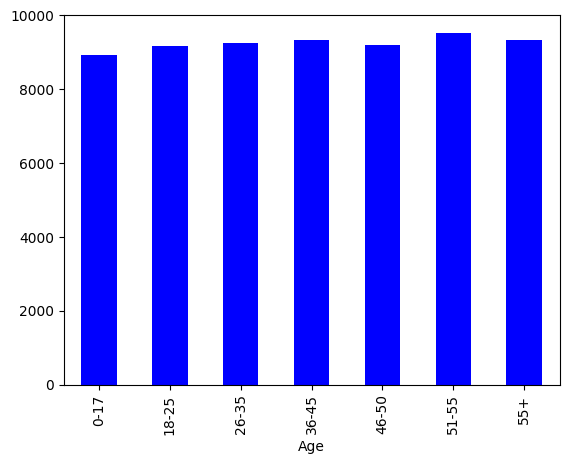

In [175]:
avg_purchase_by_age.plot(kind='bar', color='blue')

<Axes: xlabel='City_Category', ylabel='Purchase'>

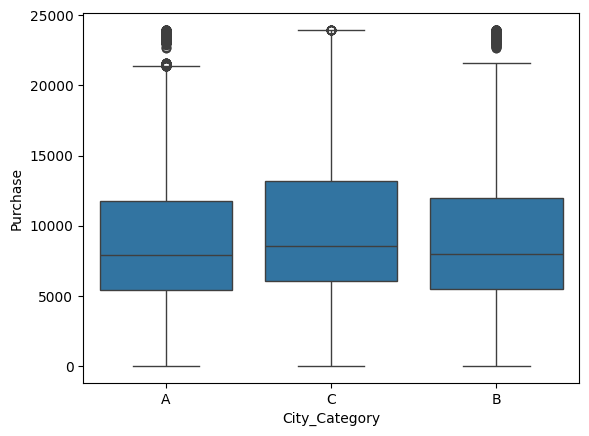

In [176]:
sns.boxplot(data=sales_2, x='City_Category', y='Purchase')

<Axes: xlabel='Product_Category_1'>

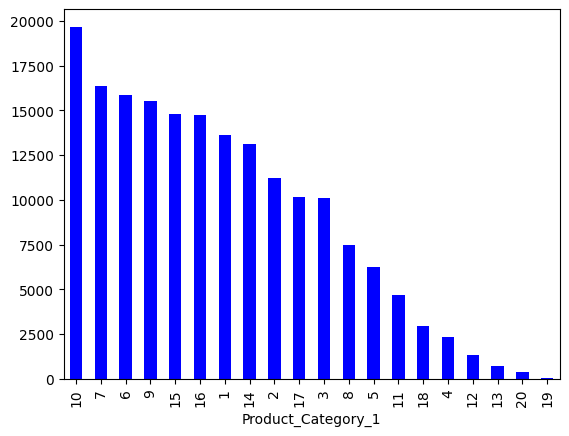

In [177]:
avg_purchase_by_category = sales_2.groupby('Product_Category_1')['Purchase'].mean()
avg_purchase_by_category.sort_values(ascending=False).plot(kind = 'bar', color= 'blue')

<Axes: xlabel='City_Category'>

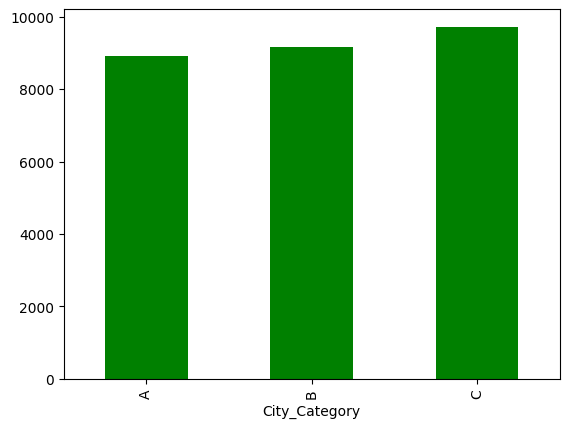

In [178]:
avg_purchase_by_occupation = sales_2.groupby('City_Category')['Purchase'].mean()
avg_purchase_by_occupation.plot(kind = 'bar', color = 'green')

In [179]:
sales_2['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [180]:
sales_2['Stay_In_Current_City_Years'] = sales_2['Stay_In_Current_City_Years'].replace('4+', 4)

In [181]:
sales_2['Gender'] = sales_2['Gender'].replace(['F','M'], [0, 1])

In [182]:
sales_2['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

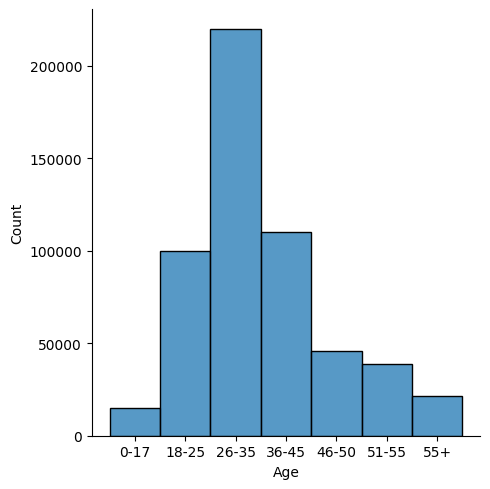

In [183]:
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

sales_2_sorted = sales_2[sales_2['Age'].isin(age_order)]
sales_2_sorted['Age'] = pd.Categorical(sales_2_sorted['Age'], categories=age_order, ordered=True)

# Plot the displot with the sorted DataFrame
sns.displot(data=sales_2_sorted, x='Age', discrete=True)

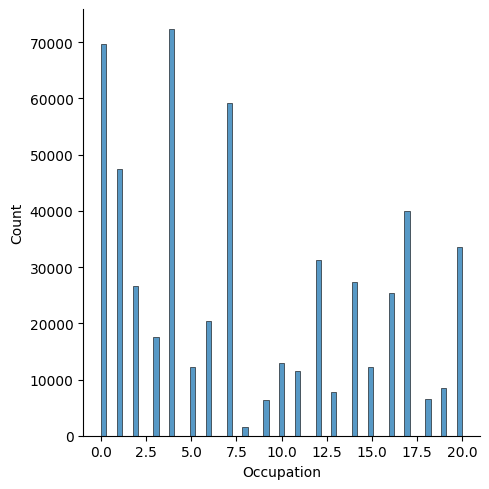

In [184]:
sns.displot(sales_2, x = 'Occupation')

In [185]:
sales_2['Stay_In_Current_City_Years'] = pd.to_numeric(sales_2['Stay_In_Current_City_Years'], errors='coerce')

In [186]:
objects = []
for c in sales_2.columns:
    if str(sales_2[c].dtype) == 'object':
        objects.append(c)

X_ = sales_2.drop(objects, axis = 1).astype('float64')
dummies = pd.get_dummies(sales_2[objects], drop_first=True)
X = pd.concat([X_, dummies], axis = 1)
X

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
0,0.0,10.0,2.0,0.0,3.0,8370.0,0,0,0,0,0,0,0,0
1,0.0,10.0,2.0,0.0,1.0,15200.0,0,0,0,0,0,0,0,0
2,0.0,10.0,2.0,0.0,12.0,1422.0,0,0,0,0,0,0,0,0
3,0.0,10.0,2.0,0.0,12.0,1057.0,0,0,0,0,0,0,0,0
4,1.0,16.0,4.0,0.0,8.0,7969.0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1.0,13.0,1.0,1.0,20.0,368.0,0,0,0,0,1,0,1,0
550064,0.0,1.0,3.0,0.0,20.0,371.0,0,1,0,0,0,0,0,1
550065,0.0,15.0,4.0,1.0,20.0,137.0,0,1,0,0,0,0,1,0
550066,0.0,1.0,2.0,0.0,20.0,365.0,0,0,0,0,0,1,0,1


In [187]:
category_dummies = pd.get_dummies(X['Product_Category_1'], drop_first = True, prefix = 'category')
sales_3 = X.drop(columns = 'Product_Category_1')
sales_f = pd.concat([sales_3, category_dummies], axis = 1)

<Axes: >

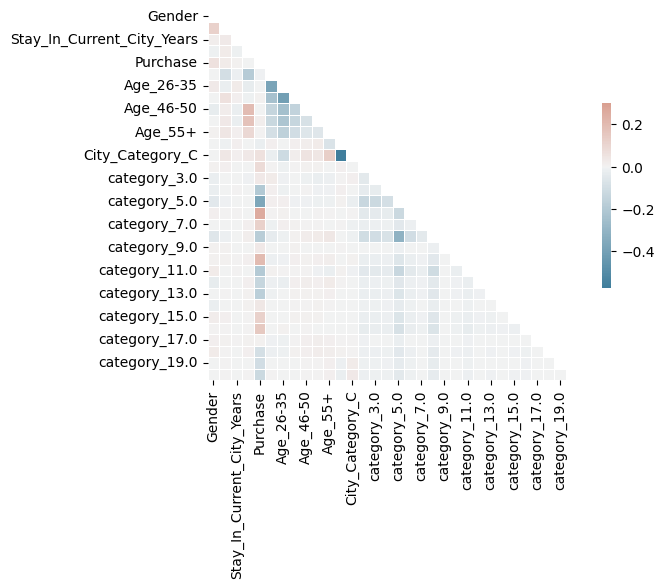

In [188]:
mask = np.triu(np.ones_like(sales_f.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(sales_f.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [189]:
test = test.fillna(0)
test = test.drop(columns = 'User_ID')
test = test.drop(columns = 'Product_ID')
test = test.drop(columns = 'Product_Category_2')
test = test.drop(columns = 'Product_Category_3')

test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].replace('4+', 4)
test['Gender'] = test['Gender'].replace(['F','M'], [0, 1])
test['Stay_In_Current_City_Years'] = pd.to_numeric(test['Stay_In_Current_City_Years'], errors='coerce')
objects = []
for c in test.columns:
    if str(test[c].dtype) == 'object':
        objects.append(c)

t_ = test.drop(objects, axis = 1).astype('float64')
dummies = pd.get_dummies(test[objects], drop_first=True)
test = pd.concat([t_, dummies], axis = 1)
category_dummies = pd.get_dummies(test['Product_Category_1'], drop_first = True, prefix = 'category')
te = test.drop(columns = 'Product_Category_1')
test_ = pd.concat([te, category_dummies], axis = 1)

In [190]:
print(sales_f.shape)
print(test_.shape)

(550068, 32)
(233599, 29)


In [191]:
column_names = test_.columns.tolist()

# Print all column names
for column_name in column_names:
    print(column_name)

Gender
Occupation
Stay_In_Current_City_Years
Marital_Status
Age_18-25
Age_26-35
Age_36-45
Age_46-50
Age_51-55
Age_55+
City_Category_B
City_Category_C
category_2.0
category_3.0
category_4.0
category_5.0
category_6.0
category_7.0
category_8.0
category_9.0
category_10.0
category_11.0
category_12.0
category_13.0
category_14.0
category_15.0
category_16.0
category_17.0
category_18.0


In [192]:
test_.shape
column_names = sales_f.columns.tolist()

# Print all column names
for column_name in column_names:
    print(column_name)

Gender
Occupation
Stay_In_Current_City_Years
Marital_Status
Purchase
Age_18-25
Age_26-35
Age_36-45
Age_46-50
Age_51-55
Age_55+
City_Category_B
City_Category_C
category_2.0
category_3.0
category_4.0
category_5.0
category_6.0
category_7.0
category_8.0
category_9.0
category_10.0
category_11.0
category_12.0
category_13.0
category_14.0
category_15.0
category_16.0
category_17.0
category_18.0
category_19.0
category_20.0


In [193]:
test_['category_19.0'] = 0
test_

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,category_10.0,category_11.0,category_12.0,category_13.0,category_14.0,category_15.0,category_16.0,category_17.0,category_18.0,category_19.0
0,1.0,7.0,2.0,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,17.0,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,1.0,4.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1.0,4.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,1.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,0.0,15.0,4.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233595,0.0,15.0,4.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233596,0.0,15.0,4.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233597,0.0,1.0,4.0,0.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [194]:
test_['category_20.0'] = 0

## Linear Regression

In [209]:
X = sales_f.drop(columns = 'Purchase')
y = sales_f['Purchase']

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
X_ols = sm.add_constant(X_train)
model_ = sm.OLS(y_train, X_ols).fit()

In [216]:
model_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                 2.535e+04
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:14:58   Log-Likelihood:            -4.1492e+06
No. Observations:              440054   AIC:                         8.299e+06
Df Residuals:                  440022   BIC:                         8.299e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.323e+04     31.879    415.131      0.000    1.32e+04    1.33e+04
Gender                       -40.5916     10.702     -3.793      0.000     -61.567     -19.616
Occupation                     1.8087      0.707      2.559      0.010       0.424       3.194
Stay_In_Current_City_Years     7.0681      3.526      2.004      0.045       0.157      13.979
Marital_Status               -61.8963      9.836     -6.293      0.000     -81.175     -42.618
Age_18-25                     24.4722     29.552      0.828      0.408     -33.449      82.393
Age_26-35                    110.8223     28.712      3.860      0.000      54.548     167.097
Age_36-45                    231.4862     29.518      7.842      0.000     173.632     289.341
Age_46-50                    240.6197     32.414      7.423      0.000     177.090     304.150
Age_51-55                    487.7515     33.154     14.712      0.000     422.771     552.732
Age_55+                      374.2330     36.362     10.292      0.000     302.964     445.502
City_Category_B              144.6032     11.279     12.820      0.000     122.496     166.711
City_Category_C              563.5474     12.186     46.245      0.000     539.663     587.432
category_2.0               -2342.0344     23.562    -99.397      0.000   -2388.216   -2295.853
category_3.0               -3498.8103     25.382   -137.848      0.000   -3548.557   -3449.063
category_4.0               -1.126e+04     32.376   -347.809      0.000   -1.13e+04   -1.12e+04
category_5.0               -7358.0131     12.541   -586.721      0.000   -7382.593   -7333.433
category_6.0                2241.0746     25.163     89.063      0.000    2191.756    2290.393
category_7.0                2857.0003     55.824     51.179      0.000    2747.588    2966.413
category_8.0               -6112.6658     13.519   -452.156      0.000   -6139.162   -6086.169
category_9.0                1774.8843    169.625     10.464      0.000    1442.425    2107.344
category_10.0               6109.6953     47.988    127.317      0.000    6015.640    6203.750
category_11.0              -8905.8413     23.406   -380.499      0.000   -8951.716   -8859.967
category_12.0              -1.229e+04     54.147   -227.062      0.000   -1.24e+04   -1.22e+04
category_13.0              -1.289e+04     46.053   -279.945      0.000    -1.3e+04   -1.28e+04
category_14.0               -479.7038     86.647     -5.536      0.000    -649.529    -309.878
category_15.0               1203.9586     43.560     27.639      0.000    1118.581    1289.336
category_16.0               1189.8485     35.159     33.842      0.000    1120.937    1258.760
category_17.0              -3537.5096    139.380    -25.380      0.000   -3810.689   -3264.330
category_18.0              -1.069e+04     6

In [220]:
X_test_ols = sm.add_constant(X_test)
y_predict = model_.predict(X_test_ols)
mse = mean_squared_error(y_test, y_predict)
mse

9214642.452802554